# Assignment 1
- **Student name:** Alvaro Alexis Muñoz Reynoso
- **Email:** alvaro.munoz7503@alumnos.udg.mx

## Modules

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import math
from scipy.stats import wrapcauchy
from scipy.stats import cauchy
from scipy.stats import levy_stable
from scipy.stats import levy

# from plotly
import plotly.graph_objects as go

import pandas as pd

# Classes

In [3]:
################# http://www.pygame.org/wiki/2DVectorClass ##################
class Vec2d(object):
    """2d vector class, supports vector and scalar operators,
       and also provides a bunch of high level functions
       """
    __slots__ = ['x', 'y']

    def __init__(self, x_or_pair, y = None):
        if y == None:            
            self.x = x_or_pair[0]
            self.y = x_or_pair[1]
        else:
            self.x = x_or_pair
            self.y = y
            
    # Addition
    def __add__(self, other):
        if isinstance(other, Vec2d):
            return Vec2d(self.x + other.x, self.y + other.y)
        elif hasattr(other, "__getitem__"):
            return Vec2d(self.x + other[0], self.y + other[1])
        else:
            return Vec2d(self.x + other, self.y + other)

    # Subtraction
    def __sub__(self, other):
        if isinstance(other, Vec2d):
            return Vec2d(self.x - other.x, self.y - other.y)
        elif (hasattr(other, "__getitem__")):
            return Vec2d(self.x - other[0], self.y - other[1])
        else:
            return Vec2d(self.x - other, self.y - other)
    
    # Vector length
    def get_length(self):
        return math.sqrt(self.x**2 + self.y**2)
    
    # rotate vector
    def rotated(self, angle):        
        cos = math.cos(angle)
        sin = math.sin(angle)
        x = self.x*cos - self.y*sin
        y = self.x*sin + self.y*cos
        return Vec2d(x, y)


## Activity 1 Correlated Random Walk 
    - Select rotations from a Cauchy distribution (scipy).
    - Implement usign Vec2d class.
    - Keep trajectory in a numpy array
    - Visualize trajectory using plotly - 2D projection

In [4]:
speed = 5
n_steps = 3000

# 2d 0's numpy matrix generated to save x, y values along the trajectory
trajectory = np.zeros((n_steps, 2))

# Cauchy rvs method generate the rotation angles to be taken on each iteration
cauchy_distribution = cauchy()
rotations = cauchy_distribution.rvs(size=n_steps)

velocity = Vec2d(speed, 0)  # Initial position

for i in range(1, n_steps):
    turn_angle = rotations[i]
    
    velocity = velocity.rotated(turn_angle)
    
    trajectory[i, 0] = trajectory[i-1, 0] + velocity.x
    trajectory[i, 1] = trajectory[i-1, 1] + velocity.y


fig_cauchy = go.Figure()

fig_cauchy.add_trace(go.Scatter(x = trajectory[:, 0],
                                        y = trajectory[:, 1],
                                        marker = dict(size=2),
                                        line = dict(width=2),
                                        mode = 'lines',
                                        name = 'Trajectory',
                                        showlegend = True
                                        
))

fig_cauchy.update_layout(
    title = 'Cauchy trajectory using numpy and Vec2d',
    autosize = False,
    width = 900,
    height= 600
)
fig_cauchy.show()

## Activity 2 Lévy distribution - N different curves
    - Plot at least the 4 different curves shown in the figure using plotly.
    - Each one of the curves corresponds to a different alpha value.
    - Consider the following parameters: m = 3.0, beta = 0.

In [5]:
# Define the parameters for the Levy distribution
alpha_values = [0.1, 0.5, 0.8, 1.0, 1.9]  # Stability parameter (0 < alpha <= 2)
beta = 0.0 # Skewness parameter (-1 <= beta <= 1)
m = 3 # Location parameter
c = 1 # Scale parameter

# Create the plot
fig = go.Figure()

for alpha in alpha_values:
    # Create the Levy-Stable distribution object
    levy_stable_dist = levy_stable(alpha, beta, loc=m, scale=c)

    # Generate data points
    x = np.linspace(-1, 7, 700) # Range of x values
    y = levy_stable_dist.pdf(x) # Probability Density Function

    # Add the Levy distribution to the plot
    fig.add_trace(go.Scatter(x=x, y=y, mode='lines', name=f'Lévy {alpha}'))


# Configure the plot to display it
fig.update_layout(
    title="Lévy distribution - N different curves",
    width=900,
    xaxis_title="x",
    yaxis_title="Probability Density",
    showlegend=True
)

fig.show()

## Lévy distribution - Histograma + Curve
    - From a set of random values drawn from a Lévy stable distribution, obtain its histogram
    and compare it to the corresponding PDF curve.
    - Visualize using matplotlib.

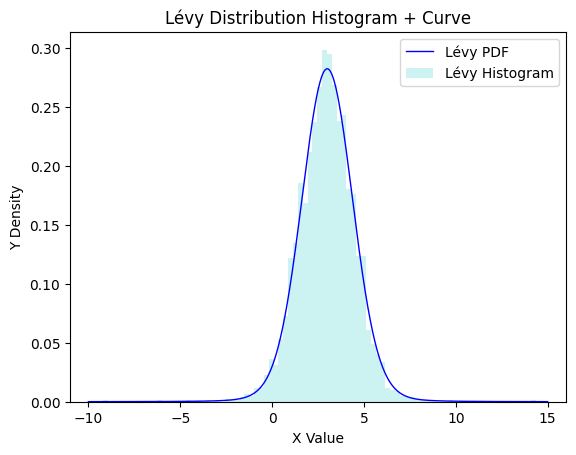

In [6]:
# Define the parameters for the Levy distribution
alpha = 1.9  # Stability parameter (0 < alpha <= 2)
beta = 0.0 # Skewness parameter (-1 <= beta <= 1)
m = 3 # Location parameter
size = 3000 # Number of x values to display Levy function


# Generate data points
x = np.linspace(-10, 15, size) # Range of x values

# Create the Levy-Stable distribution object
levy_stable_dist = levy_stable(alpha, beta, loc=m)
# Probability Density Function (the curve line to be plotted)
y = levy_stable_dist.pdf(x)

# Create figure for both histrogram and curve
fig,ax = plt.subplots(1,1)

# Plot PDF Levy curve
plt.plot(x,y,'b', lw=1, label='Lévy PDF')

# Values of y for histogram
rand_dist_values = levy_stable.rvs(alpha, beta, loc=m, size=size)

# Generate histogram and x axis limit to be displayed on the plot
ax.hist(rand_dist_values, bins='auto', density=True, histtype='stepfilled', color='c', alpha=0.2, label='Lévy Histogram')
ax.set_xlim([x[0]-1, x[-1]+1])

# Config plot labels
plt.xlabel('X Value')
plt.ylabel('Y Density')
plt.title('Lévy Distribution Histogram + Curve')
plt.legend()

plt.show()



## Lévy flight - Vec2d - 1 Trajecotry
    - Generate a Lévy flight trajectory.
    - Implement usign Vec2d class.
    - Keep the trajectory in a pandas Data Frame.
    - Visualize trajectory using plotly - 3D projection

In [34]:
# We initalize the variables
speed = 10
s_pos = [0,0,0]
n_steps = 1000
time_per_step = 0.0004

alpha = 1.5
beta = 0
m = 0

# Initialize the dataFrame to store x, y values to trace trajectory, then set initial position for Data Frame
trajectory = pd.DataFrame(columns=['x_pos', 'y_pos', 'z_pos'])
temp_df = pd.DataFrame([{'x_pos':s_pos[0], 'y_pos':s_pos[1], 'z_pos':s_pos[2]}]) 

trajectory = pd.concat([trajectory,temp_df], ignore_index=True)

# Initialize the velocity vector with initial position
velocity = Vec2d(speed, 0)

# Random values using Lévy algorithm
r = levy_stable.rvs(alpha, beta, loc=m, size=n_steps) #angle rotation values


for i in range(n_steps):
    step_length = levy_stable.rvs(alpha,beta)
    
    velocity = velocity.rotated(r[i])
    
    length_traveled = velocity.get_length() * step_length * time_per_step
    
    temp_df = pd.DataFrame([{
        'x_pos':trajectory.x_pos[i] + velocity.x * step_length, 
        'y_pos':trajectory.y_pos[i] + velocity.y * step_length, 
        'z_pos':trajectory.z_pos[i] + length_traveled
        }]
    )
    trajectory = pd.concat([trajectory, temp_df], ignore_index=True)

#Plot the trajectory
fig = go.Figure()

fig.add_trace(
    go.Scatter3d(
            x = trajectory.x_pos[:], 
            y = trajectory.y_pos[:], 
            z = trajectory.z_pos[:], 
            mode='lines', 
            showlegend=True, 
            name='Trajectory'
        )
    )

# Configure the plot to display it
fig.update_layout(
    title="Lévy flight - Vec2d - 1 Trajectory",
    width=900,
    height=800,
    xaxis_title="x",
    yaxis_title="y",

    showlegend=True
)

fig.show()



# Correlated Random Walk - Vec2d - N Trajectories
    - Generate as many CRW trajectories as specified on a control variable n_traj.
    - Each of the trajectories should be generated using a unique Cauchy coefficient.
    - Implement usign Vec2d class.
    - Keep the trajectories in a Pandas Data Frame.
    - Visualize trajectories using plotly - 3D projection

In [33]:
n_steps = 700
time_per_step = 0.0004
s_pos = [0,0,0]
speed = 5

cauchy_coefficients = [0.2,0.35,0.5,0.65,0.8,0.95]

trajectories = []
traces = []

for coefficient in cauchy_coefficients:
    # On each cauchy coefficient, trajectory data frame and velocity vector are initialized  
    trajectory = pd.DataFrame(columns=['x_pos', 'y_pos', 'z_pos'])
    temp_df = pd.DataFrame([{'x_pos':s_pos[0], 'y_pos':s_pos[1], 'z_pos':s_pos[2]}])
    trajectory =  pd.concat([trajectory, temp_df], ignore_index=True)

    velocity = Vec2d(speed, 0) # Velocity vector initialized on starting position
    
    # Cauchy Distribution Random Values for rotation angles to be taken on each step/iteration
    rotation_angles = wrapcauchy.rvs(coefficient, size=n_steps)
    
    for j in range(n_steps):
        rotation_angle = rotation_angles[j]
                
        # Set the velocity vector rotation
        velocity = velocity.rotated(rotation_angle)
        
        # Prepare step data for x, y and z values storing them in a temporary dataframe
        temp_df = pd.DataFrame([{
            'x_pos':trajectory.x_pos[j] + velocity.x,
            'y_pos':trajectory.y_pos[j] + velocity.y,
            'z_pos':trajectory.z_pos[j] + velocity.get_length() * time_per_step
            }])
        
        # Store the axes values in trajectory dataframe using pandas concat method.
        trajectory = pd.concat([trajectory, temp_df], ignore_index=True)
    
    traces.append(
        go.Scatter3d(
            x = trajectory.x_pos[:],
            y = trajectory.y_pos[:],
            z = trajectory.z_pos[:],
            mode='lines',
            name=f'Cauchy {coefficient}',
            showlegend=True
        )
    )

fig = go.Figure(traces)
fig.update_layout(
    title="Correlated Random Walk - Vec2d - N Trajectories",
    width=900,
    height=800,
    xaxis_title="x",
    yaxis_title="y",

    showlegend=True
)

fig.show()
